###  Bank Customer Churn Prediction
1. Customer churn prediction is an important task for businesses to retain their customers
and improve customer satisfaction. To develop a predictive model for customer churn
2. The aim of this project is to develop a predictive model for customer churn in a subscription-based service or business. Customer churn, or customer attrition, refers to the rate at which customers stop using a service. By analyzing historical customer data and utilizing machine learning algorithms such as Logistic Regression, Random Forests,or Gradient Boosting,aim to predict which customers are likely to churn in the future.

# import important librairies

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Load the Data Set

In [369]:
churn=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')


# Statistical Analysis of Data

In [370]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [371]:
churn.shape

(10000, 14)

In [372]:
churn.size

140000

In [373]:
churn.columns=churn.columns.str.strip()

In [374]:
churn.columns=churn.columns.str.lower()

In [375]:
churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [376]:
churn.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [377]:
print("Total number of duplicate data: ",churn.duplicated().sum())

Total number of duplicate data:  0


In [378]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [379]:
churn.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# visualization of the dataset 

<Axes: xlabel='exited', ylabel='count'>

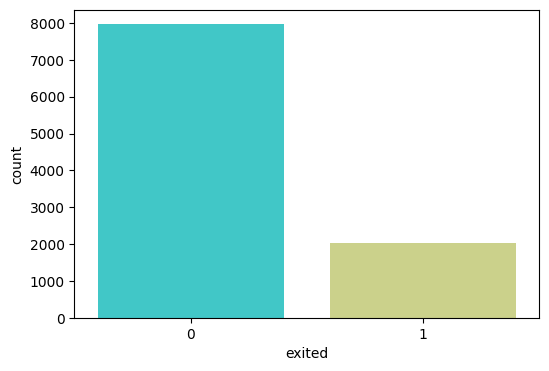

In [380]:
#visualization of the dataset from each category of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='exited',data=churn,palette='rainbow')

In [381]:
churn['exited'].value_counts().to_frame()

,count
exited,
0,7963
1,2037


The dataset is quite imbalanced, to deal with it we can either perform some sampling technique or chose appropriate evaluation matrix, here we will go with the later

In [382]:
from sklearn.utils import resample
churn_majority=churn[churn['exited']==0]
churn_minority=churn[churn['exited']==1]
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)
churn_df=pd.concat([churn_majority_downsample,churn_minority])


In [383]:
churn_df['exited'].value_counts().to_frame()

,count
exited,
0,2037
1,2037


<Axes: xlabel='exited', ylabel='count'>

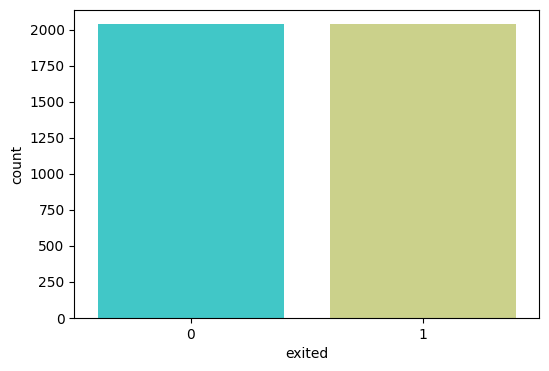

In [384]:
#visualization of the dataset from each category of target variable after balance
plt.figure(figsize=(6,4))
sns.countplot(x='exited',data=churn_df,palette='rainbow')

<Axes: xlabel='gender', ylabel='count'>

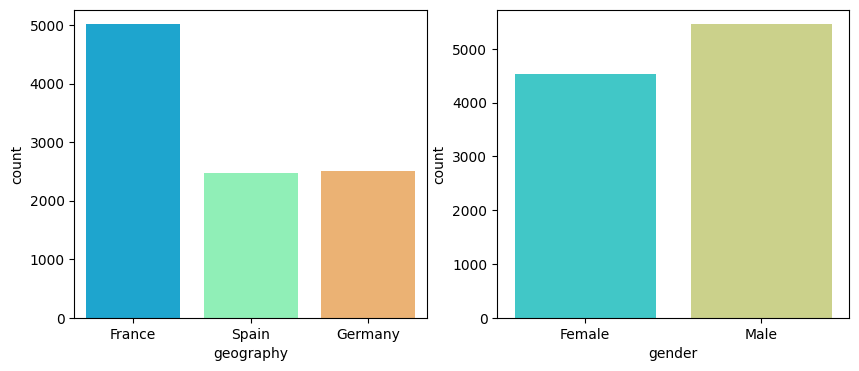

In [385]:
fig=plt.figure(figsize=(10,4))
ax=[None for _ in range(2)]
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))

sns.countplot(x='geography',data=churn,palette='rainbow',ax=ax[0])
sns.countplot(x='gender',data=churn,palette='rainbow',ax=ax[1])

In [386]:
churn_df.columns



Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [387]:
churn_df.drop(['rownumber', 'customerid', 'surname','geography','gender'],axis=1,inplace=True)

In [388]:
churn_df.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
age,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
tenure,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
balance,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
numofproducts,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
hascrcard,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
isactivemember,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
estimatedsalary,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173
exited,-0.034660,0.343870,-0.016491,0.146820,-0.054669,-0.017800,-0.201877,0.006173,1.000000


<Axes: >

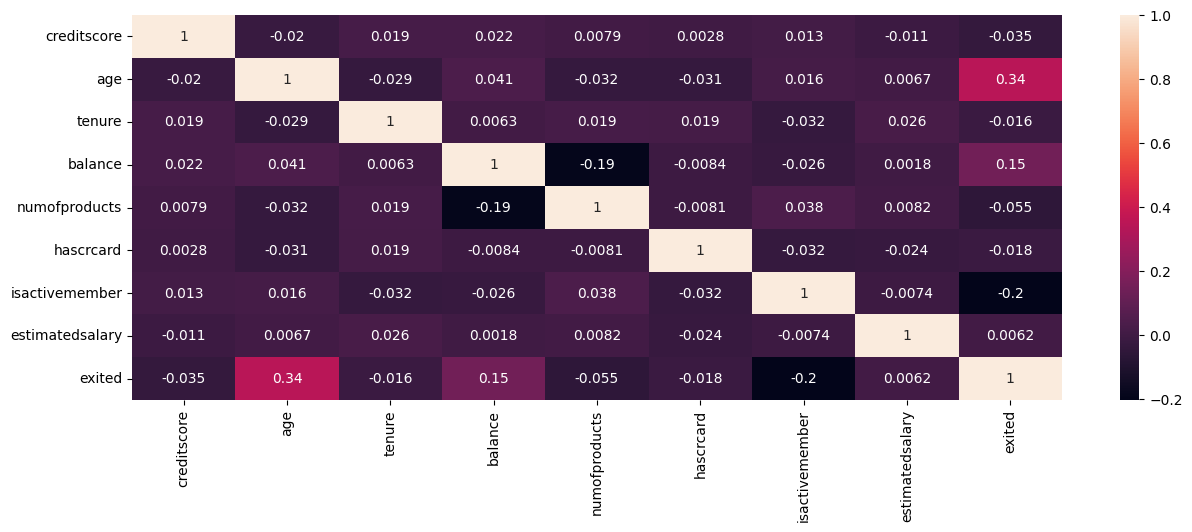

In [389]:
plt.figure(figsize=(15,5))
sns.heatmap(churn_df.corr(),annot=True)

In [390]:
df_corr_exit=churn_df.corr()['exited'].to_frame()

<Axes: ylabel='exited'>

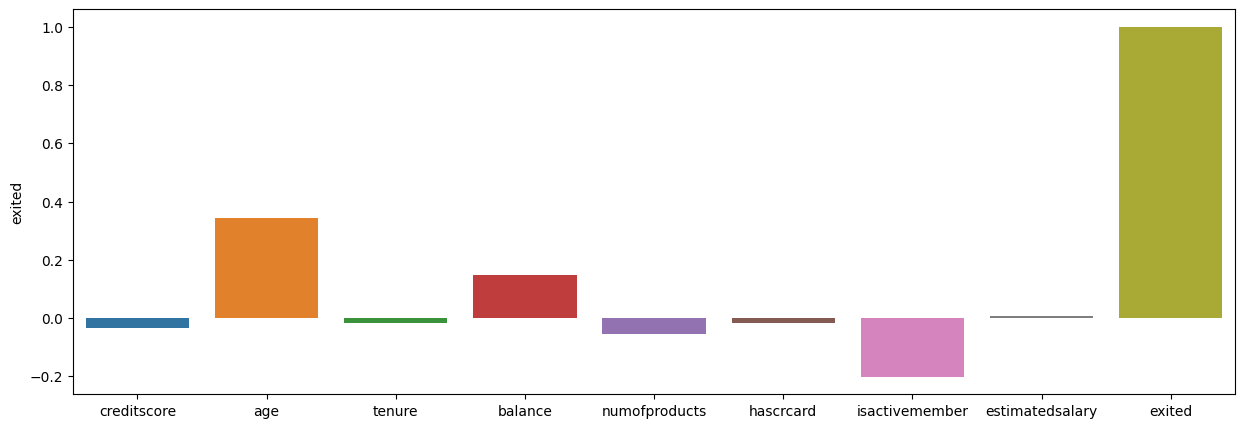

In [391]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='exited')

# Spliting the Data Set

In [392]:
x=churn_df.drop(['exited'],axis=1)
y=churn_df['exited']

In [393]:
# Separating features and Target

X=churn.drop(columns=['rownumber','customerid','geography','surname','gender','exited'], axis=1)
Y=churn['exited']

In [394]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.32,random_state=42)

In [395]:
x_train.shape


(2770, 8)

In [396]:
x_test.shape

(1304, 8)

# Modeling on balanced Training data 

In [397]:
from sklearn.linear_model import LogisticRegression


In [398]:
# Initialize and train LogisticRegression
lr=LogisticRegression(max_iter=400)
# Initialize and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100)

# Initialize and train Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)


In [399]:
lr.fit(x_train,y_train)
rf_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [400]:
# Make predictions on the test data for each classifier
y_pred=lr.predict(x_test)
y_pred_rf = rf_model.predict(x_test)
y_pred_gb = gb_model.predict(x_test)

In [401]:
# Evaluate the model on the testing data
accuracy = lr.score(x_test, y_test)
print("Accuracy of logistic regression:", accuracy)  

accuracy = rf_model.score(x_test, y_test)
print("Accuracy of logistic regression:", accuracy)  

accuracy = gb_model.score(x_test, y_test)
print("Accuracy of logistic regression:", accuracy)  

Accuracy of logistic regression: 0.6526073619631901
Accuracy of logistic regression: 0.7538343558282209
Accuracy of logistic regression: 0.7553680981595092


In [402]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    cf_report = classification_report(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    
    print('Accuracy', accuracy)
    print('Classification Report', cf_report)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

In [403]:
evaluate(y_test,y_pred)

Accuracy 0.6526073619631901
Classification Report               precision    recall  f1-score   support

           0       0.69      0.61      0.65       686
           1       0.62      0.70      0.66       618

    accuracy                           0.65      1304
   macro avg       0.66      0.65      0.65      1304
weighted avg       0.66      0.65      0.65      1304

Precision 0.6552938672720179
Recall 0.654908149112627
F1-Score 0.6525728320649882


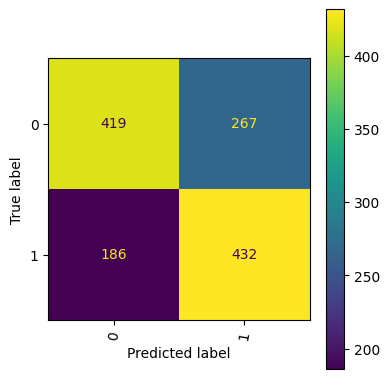

In [404]:
fig, ax = plt.subplots(figsize=(4, 4))
    # Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [405]:
evaluate( y_test, y_pred_rf)


Accuracy 0.7538343558282209
Classification Report               precision    recall  f1-score   support

           0       0.76      0.78      0.77       686
           1       0.75      0.72      0.74       618

    accuracy                           0.75      1304
   macro avg       0.75      0.75      0.75      1304
weighted avg       0.75      0.75      0.75      1304

Precision 0.7534383373728615
Recall 0.7523210393727533
F1-Score 0.7526822826655323


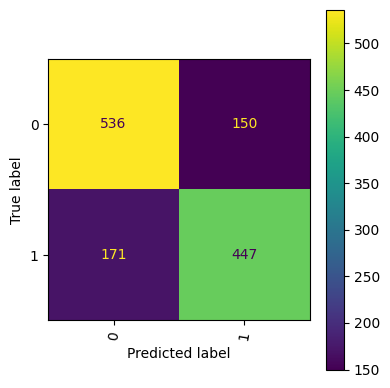

In [406]:
fig, ax = plt.subplots(figsize=(4, 4))
    # Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cmp = ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [407]:
evaluate( y_test, y_pred_gb)

Accuracy 0.7553680981595092
Classification Report               precision    recall  f1-score   support

           0       0.77      0.77      0.77       686
           1       0.74      0.74      0.74       618

    accuracy                           0.76      1304
   macro avg       0.75      0.75      0.75      1304
weighted avg       0.76      0.76      0.76      1304

Precision 0.7547024032801813
Recall 0.7546609489843094
F1-Score 0.7546812293774382


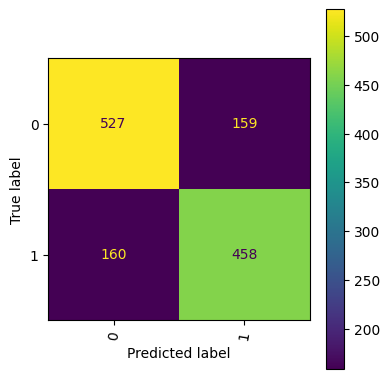

In [408]:
fig, ax = plt.subplots(figsize=(4, 4))
    # Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
cmp = ConfusionMatrixDisplay(cm, display_labels=gb_model.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

# Modeling on imbalanced Training data

In [409]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y,test_size=0.32,random_state=42)

In [410]:
lr.fit(x_train1,y_train1)
rf_model.fit(x_train1, y_train1)
gb_model.fit(x_train1, y_train1)

GradientBoostingClassifier()

In [411]:
# Make predictions on the test data for each classifier
y_pred1=lr.predict(x_test1)
y_pred_rf1 = rf_model.predict(x_test1)
y_pred_gb1 = gb_model.predict(x_test1)

In [412]:
# Evaluate the model on the testing data
accuracy = lr.score(x_test1, y_test1)
print("Accuracy of logistic regression:", accuracy)  

accuracy = rf_model.score(x_test1, y_test1)
print("Accuracy of logistic regression:", accuracy)  

accuracy = gb_model.score(x_test1, y_test1)
print("Accuracy of logistic regression:", accuracy)  

Accuracy of logistic regression: 0.80125
Accuracy of logistic regression: 0.85875
Accuracy of logistic regression: 0.8646875


In [413]:
evaluate( y_test1, y_pred_rf1)


Accuracy 0.85875
Classification Report               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2575
           1       0.75      0.42      0.54       625

    accuracy                           0.86      3200
   macro avg       0.81      0.69      0.73      3200
weighted avg       0.85      0.86      0.84      3200

Precision 0.8100882513449762
Recall 0.6917126213592233
F1-Score 0.7263158372759949


In [414]:
evaluate( y_test1, y_pred_gb1)

Accuracy 0.8646875
Classification Report               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2575
           1       0.78      0.43      0.55       625

    accuracy                           0.86      3200
   macro avg       0.83      0.70      0.74      3200
weighted avg       0.86      0.86      0.85      3200

Precision 0.8263597182334093
Recall 0.7002485436893204
F1-Score 0.7371555549316625
